In [1]:
import pandas as pd
df = pd.read_csv("../data_df_per_token_avgs.csv")
bertweet_unknown_abbreviations=["tmb", "tftf", "prt", "nts", "mtf", "mrt", "icymi", "ftl", "fomo", "eml", "cr8", "clk", "chk", "bgd", "bfn"]


In [2]:

df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
df

,abbreviation,full_length,count_abbr,count_fl,abbr_mask_all_avg_per_token,abbr_seq_avg_per_token,abbr_mask_all_surprisal_mean,abbr_sequential_surprisal_mean,fl_mask_all_avg_per_token,fl_seq_avg_per_token,fl_mask_all_surprisal_mean,fl_sequential_surprisal_mean,abbr_len,fl_len,compression
0,idk,i don't know,36,64,37.461319,37.461319,37.461319,37.461319,28.148996,28.148996,225.191971,225.191971,3,12,0.750000
1,rn,right now,29,204,30.756411,30.756411,30.756411,30.756411,28.855556,28.855556,115.422226,115.422226,2,9,0.777778
2,omg,oh my god,167,14,39.768925,39.768925,39.768925,39.768925,32.529274,32.529274,195.175674,195.175674,3,9,0.666667
3,idc,i don't care,9,9,33.462269,33.462269,33.462269,33.462269,27.202675,27.202675,217.621399,217.621399,3,12,0.750000
4,lol,laugh out loud,826,1,28.466780,28.466780,28.466780,28.466780,34.062878,34.062878,204.377258,204.377258,3,14,0.785714
5,bro,brother,242,278,28.664240,28.664240,28.664240,28.664240,27.837458,27.837458,27.837458,27.837458,3,7,0.571429
6,dm,direct message,100,0,36.006973,36.006973,36.006973,36.006973,NaN,NaN,NaN,NaN,2,14,0.857143
7,sry,sorry,1,152,47.639874,47.639874,47.639874,47.639874,32.261646,32.261646,32.261646,32.261646,3,5,0.400000
8,v,very,584,538,29.897020,29.897020,29.897020,29.897020,35.108437,35.108437,35.108437,35.108437,1,4,0.750000
9,w,with,1181,11063,32.453712,32.453712,32.453712,32.453712,29.541964,29.541964,29.541964,29.541964,1,4,0.750000


In [ ]:

print("means sequential: ", df["abbr_sequential_surprisal_mean"].mean(), df["fl_sequential_surprisal_mean"].mean())
print("means mask all: ", df["abbr_mask_l2r_surprisal_mean"].mean(), df["fl_mask_l2r_surprisal_mean"].mean())
print("counts: ", df["count_abbr"].mean(), df["count_fl"].mean())

means sequential:  49.83854413586994 104.10290934244792
means mask all:  49.83854413586994 104.10290934244792
counts:  137.4181818181818 955.2727272727273


In [ ]:
df_subset = df[df['full_length'].str.contains(" ")]
df_subset = df_subset[df_subset["count_abbr"]>2]
df_subset = df_subset[df_subset["count_fl"]>2]
print("means sequential: ", df_subset["abbr_sequential_surprisal_mean"].mean(), df_subset["fl_sequential_surprisal_mean"].mean())
print("means mask all: ", df_subset["abbr_mask_l2r_surprisal_mean"].mean(), df_subset["fl_mask_l2r_surprisal_mean"].mean())


means sequential:  47.22782208369328 171.43966087928186
means mask all:  47.22782208369328 171.43966087928186


In [ ]:
df_subset = df[~df['full_length'].str.contains(" ")]
df_subset = df_subset[df_subset["count_abbr"]>2]
df_subset = df_subset[df_subset["count_fl"]>2]
print("means sequential: ", df_subset["abbr_sequential_surprisal_mean"].mean(), df_subset["fl_sequential_surprisal_mean"].mean())
print("means mask all: ", df_subset["abbr_mask_l2r_surprisal_mean"].mean(), df_subset["fl_mask_l2r_surprisal_mean"].mean())


means sequential:  34.18267323420598 33.2904774592473
means mask all:  34.18267323420598 33.2904774592473


In [6]:
print("per token averages: ", df["fl_seq_avg_per_token"].mean(), df["abbr_seq_avg_per_token"].mean())

per token averages:  31.858137851291232 35.19445153169854


In [7]:
df.corr(method="pearson", numeric_only=True) # .5-1 is strong, .3-.5 is moderate

,count_abbr,count_fl,abbr_mask_all_avg_per_token,abbr_seq_avg_per_token,abbr_mask_all_surprisal_mean,abbr_sequential_surprisal_mean,fl_mask_all_avg_per_token,fl_seq_avg_per_token,fl_mask_all_surprisal_mean,fl_sequential_surprisal_mean,abbr_len,fl_len,compression
count_abbr,1.000000,0.760439,-0.309873,-0.309873,-0.239164,-0.239164,-0.044583,-0.044583,-0.267525,-0.267525,-0.626443,-0.386021,-0.005317
count_fl,0.760439,1.000000,-0.181925,-0.181925,-0.143517,-0.143517,-0.097080,-0.097080,-0.298285,-0.298285,-0.512161,-0.365277,-0.142804
abbr_mask_all_avg_per_token,-0.309873,-0.181925,1.000000,1.000000,0.298929,0.298929,0.131158,0.131158,0.251632,0.251632,0.280367,0.236035,0.103553
abbr_seq_avg_per_token,-0.309873,-0.181925,1.000000,1.000000,0.298929,0.298929,0.131158,0.131158,0.251632,0.251632,0.280367,0.236035,0.103553
abbr_mask_all_surprisal_mean,-0.239164,-0.143517,0.298929,0.298929,1.000000,1.000000,-0.045486,-0.045486,0.336493,0.336493,0.388528,0.321612,0.088513
abbr_sequential_surprisal_mean,-0.239164,-0.143517,0.298929,0.298929,1.000000,1.000000,-0.045486,-0.045486,0.336493,0.336493,0.388528,0.321612,0.088513
fl_mask_all_avg_per_token,-0.044583,-0.097080,0.131158,0.131158,-0.045486,-0.045486,1.000000,1.000000,-0.176566,-0.176566,-0.099744,-0.288018,-0.312148
fl_seq_avg_per_token,-0.044583,-0.097080,0.131158,0.131158,-0.045486,-0.045486,1.000000,1.000000,-0.176566,-0.176566,-0.099744,-0.288018,-0.312148
fl_mask_all_surprisal_mean,-0.267525,-0.298285,0.251632,0.251632,0.336493,0.336493,-0.176566,-0.176566,1.000000,1.000000,0.474889,0.791550,0.578024
fl_sequential_surprisal_mean,-0.267525,-0.298285,0.251632,0.251632,0.336493,0.336493,-0.176566,-0.176566,1.000000,1.000000,0.474889,0.791550,0.578024


In [8]:
df.corr(method="spearman", numeric_only=True) # >.7 is strong, .4-.6 is moderate

,count_abbr,count_fl,abbr_mask_all_avg_per_token,abbr_seq_avg_per_token,abbr_mask_all_surprisal_mean,abbr_sequential_surprisal_mean,fl_mask_all_avg_per_token,fl_seq_avg_per_token,fl_mask_all_surprisal_mean,fl_sequential_surprisal_mean,abbr_len,fl_len,compression
count_abbr,1.000000,0.378840,-0.349855,-0.349855,-0.618049,-0.618049,-0.049122,-0.049122,-0.207940,-0.207940,-0.556518,-0.304753,-0.006537
count_fl,0.378840,1.000000,-0.248836,-0.248836,-0.217315,-0.217315,0.083694,0.083694,-0.668230,-0.668230,-0.459660,-0.826148,-0.718822
abbr_mask_all_avg_per_token,-0.349855,-0.248836,1.000000,1.000000,0.763800,0.763800,0.225755,0.225755,0.228457,0.228457,0.311261,0.296056,0.093405
abbr_seq_avg_per_token,-0.349855,-0.248836,1.000000,1.000000,0.763800,0.763800,0.225755,0.225755,0.228457,0.228457,0.311261,0.296056,0.093405
abbr_mask_all_surprisal_mean,-0.618049,-0.217315,0.763800,0.763800,1.000000,1.000000,0.317652,0.317652,0.130639,0.130639,0.410085,0.217916,-0.066035
abbr_sequential_surprisal_mean,-0.618049,-0.217315,0.763800,0.763800,1.000000,1.000000,0.317652,0.317652,0.130639,0.130639,0.410085,0.217916,-0.066035
fl_mask_all_avg_per_token,-0.049122,0.083694,0.225755,0.225755,0.317652,0.317652,1.000000,1.000000,-0.101186,-0.101186,-0.108120,-0.278689,-0.294367
fl_seq_avg_per_token,-0.049122,0.083694,0.225755,0.225755,0.317652,0.317652,1.000000,1.000000,-0.101186,-0.101186,-0.108120,-0.278689,-0.294367
fl_mask_all_surprisal_mean,-0.207940,-0.668230,0.228457,0.228457,0.130639,0.130639,-0.101186,-0.101186,1.000000,1.000000,0.476295,0.800700,0.613133
fl_sequential_surprisal_mean,-0.207940,-0.668230,0.228457,0.228457,0.130639,0.130639,-0.101186,-0.101186,1.000000,1.000000,0.476295,0.800700,0.613133


In [ ]:
# need to do indiv word lengths
import pandas as pd
df = pd.read_csv("../data_df.csv")
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]

drop_unknowns["abbr_len"] =  drop_unknowns["abbreviation"].str.len()
drop_unknowns["fl_len"] = drop_unknowns["full_length"].str.len()
drop_unknowns["compression"] = 1- (drop_unknowns["abbr_len"]/drop_unknowns["fl_len"])
new_df = pd.DataFrame()
fl_len =  drop_unknowns["fl_len"]
abbr_len = drop_unknowns["abbr_len"]
len = pd.concat([fl_len, abbr_len], ignore_index=True)
counts = pd.concat([drop_unknowns["count_fl"], drop_unknowns["count_abbr"]], ignore_index=True)
surprisal_seq = pd.concat([drop_unknowns["fl_sequential_surprisal_mean"], drop_unknowns["abbr_sequential_surprisal_mean"]], ignore_index=True)
surprisal_mask_l2r = pd.concat([drop_unknowns["fl_mask_l2r_surprisal_mean"], drop_unknowns["abbr_mask_l2r_surprisal_mean"]], ignore_index=True)
new_df["word_length"] = len
new_df["frequency"] = counts
new_df["surprisal_seq"] = surprisal_seq
new_df["surprisal_mask_l2r"] = surprisal_mask_l2r
new_df

/var/folders/_l/m75yx49j3q98z5jct8l93xd40000gp/T/ipykernel_14365/3005240206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_unknowns["abbr_len"] =  drop_unknowns["abbreviation"].str.len()
/var/folders/_l/m75yx49j3q98z5jct8l93xd40000gp/T/ipykernel_14365/3005240206.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_unknowns["fl_len"] = drop_unknowns["full_length"].str.len()
/var/folders/_l/m75yx49j3q98z5jct8l93xd40000gp/T/ipykernel_14365/3005240206.py:8: SettingWithCopyWarning: 
A value is tryi

,word_length,frequency,surprisal_seq,surprisal_mask_all
0,12,64,225.191971,109.706657
1,9,204,115.422226,56.641335
2,9,14,195.175674,99.686195
3,12,9,217.621399,108.891891
4,14,1,204.377258,99.933151
...,...,...,...,...
75,3,0,NaN,NaN
76,3,26,35.833855,35.833855
77,2,11,38.661861,38.661861
78,2,7,38.302620,38.302620


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df_drop_nan = np.log2(new_df[new_df['frequency'] != 0])
X_freq = df_drop_nan[["frequency"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_seq'].notna()]
X_seq = df_drop_nan[["surprisal_seq"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_mask_l2r'].notna()]
X_mask_l2r = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

y = df_drop_nan["word_length"].to_numpy()

weights = np.ones_like(y)
for idx, X in enumerate([X_freq, X_seq, X_mask_l2r]):
    reg = LinearRegression(copy_X=True, fit_intercept=False).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)
    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    else:
        print("surprisal mask all")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

frequency
rsquared, mse:  -0.9391665753620135 5.711278055202386
pearson corr, pvalue:  -0.38658021970487366 0.000795791301047588
spearman corr, pvalue:  -0.3585474412391954 0.001983748454721058
surprisal sequential
rsquared, mse:  0.6772568509271636 2.329991099998208
pearson corr, pvalue:  0.8552099087372571 1.1566317088975168e-21
spearman corr, pvalue:  0.6487740720065419 7.144488930039654e-10
surprisal mask all
rsquared, mse:  0.6814362034484803 2.3148558678472266
pearson corr, pvalue:  0.8416532079990291 2.0838021658603826e-20
spearman corr, pvalue:  0.6498206400513173 6.570494863534676e-10


60.07544409141685 0.20309572192632186 132.23317809779036
-0.4506614271560434 0.009640119095410484
-0.4230205278592375 0.01585508584832814


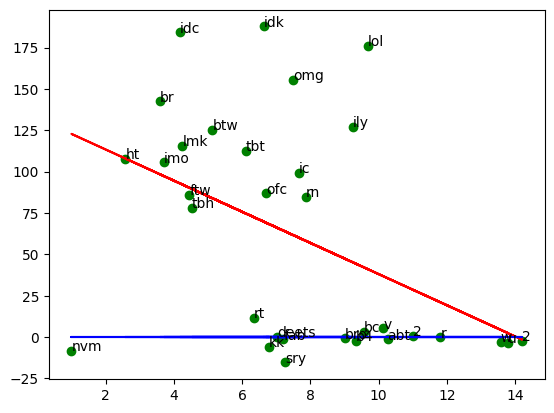

In [ ]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_df_per_token_avgs.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# get stats for log(fl_freq + abbr_freq)
x_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_log_freq = np.log2(x_log_freq).to_numpy()
x_log_freq =  x_log_freq[:, None]

# predict surprisal
y_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_log_freq[i], y_diff_in_surprisal[i]))
plt.plot(x_log_freq, reg.predict(x_log_freq),color='red')
plt.plot(x_log_freq, np.zeros_like(x_log_freq),color='blue')
corr_pearson, p_value_pearson = scipy.stats.pearsonr(x_log_freq[:, 0], y_diff_in_surprisal)
corr_spearman, p_value_spearman = scipy.stats.spearmanr(x_log_freq[:, 0], y_diff_in_surprisal)
print(corr_pearson, p_value_pearson)
print(corr_spearman, p_value_spearman )

# basically this means that frequency is not a very good predictor i think

0.10543572134991255 0.24603990658332797 0.6060074361251782


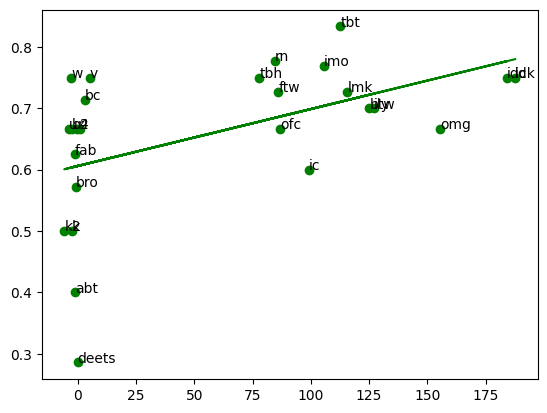

In [ ]:
from matplotlib import pyplot as plt
df = pd.read_csv("../data_df_per_token_avgs.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

# drop where any count is 0
df_drop_nan = df[df['count_fl'] > 1]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] >1]
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# drop where any surprisal is NaN, it should be taken care of already
# df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
# df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
# plot for diff in surprisal predicting compression
x_diff_in_surprisal = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"]
x_diff_in_surprisal = x_diff_in_surprisal.to_numpy()
x_diff_in_surprisal =  x_diff_in_surprisal[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_surprisal, y_compression, weights)
r_squared = reg.score(x_diff_in_surprisal, y_compression)

y_predict = reg.predict(x_diff_in_surprisal)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_surprisal, y_compression,color='g')
ax.plot(x_diff_in_surprisal, reg.predict(x_diff_in_surprisal),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_surprisal[i], y_compression[i]))

0.1216329833267084 0.0565340835984518 0.7354572106400308


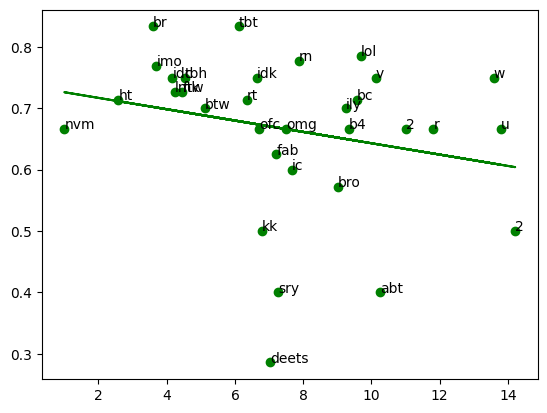

In [ ]:

df = pd.read_csv("../data_df_per_token_avgs.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

# drop where any count is 0
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

# drop where any surprisal is NaN, it should be taken care of already
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

# drop instances where the token for the abbreviation is <unk>
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]

# frequency (log of sum) as a predictor for compression
x_diff_in_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_diff_in_freq = np.log2(x_diff_in_freq.to_numpy())
x_diff_in_freq =  x_diff_in_freq[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_freq, y_compression, weights)
r_squared = reg.score(x_diff_in_freq, y_compression)

y_predict = reg.predict(x_diff_in_freq)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_freq, y_compression,color='g')
ax.plot(x_diff_in_freq, reg.predict(x_diff_in_freq),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_freq[i], y_compression[i]))


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_df_per_token_avgs.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]
drop_unknowns = drop_unknowns[drop_unknowns['count_fl'] != 0]
drop_unknowns = drop_unknowns[drop_unknowns['count_abbr'] != 0]

for idx in range(4):
    if idx == 0:
        
        df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
        X = df_drop_nan[["frequency"]].to_numpy()
    elif idx == 1:
        df_drop_nan = drop_unknowns[drop_unknowns['fl_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"] 
        X = df_drop_nan[["surprisal_seq"]].to_numpy()
    elif idx == 2:
        df_drop_nan = drop_unknowns[drop_unknowns['abbr_mask_l2r_surprisal_mean'].notna()]
        df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

        df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
        X = df_drop_nan[["surprisal_mask_l2r"]].to_numpy()

    else:
        df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
        df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
        X = df_drop_nan[["fl_len"]].to_numpy()
    y = df_drop_nan["compression"].to_numpy()
    weights = np.ones_like(y)

    reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)

    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    elif idx == 2:
        print("surprisal mask all")
    else:
        print("word length")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

frequency
rsquared, mse:  0.06203837253035149 0.12127765388625178
pearson corr, pvalue:  0.24907503393626515 0.16922379568601678
spearman corr, pvalue:  0.12462165137658028 0.4967733020109131
surprisal sequential
rsquared, mse:  0.30736907417723114 0.1042171495544356
pearson corr, pvalue:  0.5544087609131292 0.0009926247647841686
spearman corr, pvalue:  0.6197660286516913 0.00015503348838361854
surprisal mask all
rsquared, mse:  0.30736907417723114 0.1042171495544356
pearson corr, pvalue:  0.5544087609131292 0.0009926247647841686
spearman corr, pvalue:  0.6197660286516913 0.00015503348838361854
word length
rsquared, mse:  0.30547699404161266 0.10435939899005121
pearson corr, pvalue:  0.5526997322612095 0.0010367803473486225
spearman corr, pvalue:  0.6571084478393711 4.3988651355114356e-05


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

import scipy
df = pd.read_csv("../data_df_per_token_avgs.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]
df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_l2r_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_l2r_surprisal_mean'].notna()]

df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] - df_drop_nan["abbr_sequential_surprisal_mean"]
df_drop_nan["surprisal_mask_l2r"] = df_drop_nan["fl_mask_l2r_surprisal_mean"] - df_drop_nan["abbr_mask_l2r_surprisal_mean"] 
X= df_drop_nan[["surprisal_mask_l2r", "frequency", "fl_len"]].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df_drop_nan["compression"].to_numpy()
weights = np.ones_like(y)

reg = LinearRegression(copy_X=True, fit_intercept=True).fit(X, y, weights)
r_squared = reg.score(X, y)

y_predict = reg.predict(X)
reg.coef_


    

array([0.02297069, 0.05556806, 0.06953369])